# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Oprah Winfrey
- Miley Cyrus
- Sam Smith
- J. Cole

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import json
import numpy as np

pd.set_option('precision', 2)

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Data Analysis & Results

### Analysis 1

importing Jupyter notebook from city_and_county_datasets.ipynb
============== TOP TEST ===============
                                                 Fact  \
0        Population estimates, July 1, 2018,  (V2018)   
1   Population estimates base, April 1, 2010,  (V2...   
2   Population, percent change - April 1, 2010 (es...   
3                   Population, Census, April 1, 2010   
4                      Persons under 5 years, percent   
5                     Persons under 18 years, percent   
6                  Persons 65 years and over, percent   
7                             Female persons, percent   
8                                White alone, percent   
9            Black or African American alone, percent   
10   American Indian and Alaska Native alone, percent   
11                               Asian alone, percent   
12  Native Hawaiian and Other Pacific Islander alo...   
13                         Two or More Races, percent   
14                        Hispanic or Lati

Before cleaning:
object

After cleaning:
float64
NaN values in each column for cambridge-ma:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for newhaven-ct:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for stanford-ca:
Fact           5
Fact Value    21
dtype: int64
NaN values in each column for jacksonville-il:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for westerville-oh:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for whitewater-wi:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for greensburg-pa:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for redding-ca:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for sanbernardino-ca:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for berkeley-ca:
Fact           5
Fact Value    23
dtype: int64
NaN values in each column for middl

6      White alone, not Hispanic or Latino, percent        93.9


alameda-ca | shape: (8, 2)
                                                Fact  Fact Value
0                               White alone, percent        50.2
1           Black or African American alone, percent        11.3
2   American Indian and Alaska Native alone, percent         1.1
3                               Asian alone, percent        31.1
4  Native Hawaiian and Other Pacific Islander alo...         1.0
5                         Two or More Races, percent         5.3
6                        Hispanic or Latino, percent        22.5
7       White alone, not Hispanic or Latino, percent        31.5


importing Jupyter notebook from top500_undergradpop_demographic.ipynb


,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
cambridge-ma,0.11,0.16,0.09,0.04,0.00,0.00,2.00e-02,0.62
newhaven-ct,0.33,0.05,0.30,0.04,0.00,0.00,1.50e-01,0.30
stanford-ca,0.04,0.27,0.14,0.10,0.00,0.00,2.00e-02,0.47
jacksonville-il,0.11,0.01,0.04,0.03,0.00,0.00,2.08e-17,0.82
westerville-oh,0.08,0.02,0.02,0.03,0.00,0.00,1.00e-02,0.85
whitewater-wi,0.04,0.02,0.10,0.03,0.00,0.01,2.00e-02,0.82
greensburg-pa,0.06,0.01,0.02,0.04,0.00,0.00,1.00e-02,0.86
redding-ca,0.01,0.05,0.10,0.05,0.02,0.00,3.00e-02,0.78
sanbernardino-ca,0.14,0.04,0.64,0.05,0.01,0.00,1.90e-01,0.15
berkeley-ca,0.09,0.20,0.11,0.07,0.01,0.01,2.00e-02,0.55


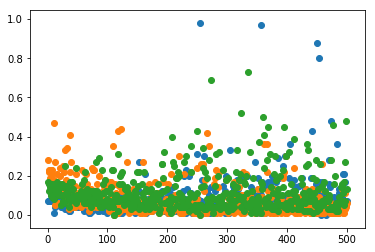

In [3]:
# to run this you will need to go to your terminal and type in: pip install import-ipynb
import import_ipynb
import city_and_county_datasets as citydata
import top500_undergradpop_demographic as undergrad_demo

df_undergrads = undergrad_demo.df_top500
df_cities = citydata.df_cities
df_counties = citydata.df_counties
df_cities

In [4]:
df_undergrads

,ranking,name,undergradpop,African American,Asian,Hispanic,Multiracial,Native American,Pacific Islander,Unknown,White
0,1,massachusetts-institute-of-technology,4510,0.07,0.28,0.17,0.07,0,0,0.02,0.39
1,2,stanford-university,7064,0.07,0.23,0.16,0.12,0.01,0,0.01,0.4
2,3,harvard-university,7147,0.07,0.22,0.12,0.06,0,0,0.04,0.49
3,4,yale-university,5743,0.07,0.19,0.14,0.06,0.01,0,0.04,0.49
4,5,princeton-university,5260,0.08,0.23,0.1,0.05,0,0,0.07,0.47
5,6,university-of-pennsylvania,10496,0.08,0.23,0.1,0.05,0,0,0.05,0.49
6,7,columbia-university,7592,0.09,0.21,0.16,0.06,0,0,0.04,0.45
7,8,duke-university,6669,0.11,0.23,0.09,0.02,0.01,0,0.03,0.51
8,9,brown-university,6666,0.07,0.16,0.13,0.07,0,0,0.09,0.48
9,10,california-institute-of-technology,961,0.01,0.47,0.13,0.08,0,0,0,0.31


In [ ]:
df1 = df_cities.loc[]

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*